In [2]:
#import all necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [3]:
data=pd.read_csv("Sentiment.csv")
#keeping only text and sentiment columns
data = data[['text','sentiment']]
data

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [4]:
#splitting data into train and test set. Test set is 10% of orginal data
train, test = train_test_split(data, test_size=0.1)
#also removing netral sentiments
train = train[train.sentiment!="Neutral"]

In [5]:
#separatinge positive and negative data
train_pos = train[train.sentiment=="Positive"]
train_pos = train_pos.text
train_neg = train[train.sentiment=="Negative"]
train_neg = train_neg.text

In [6]:
#defining wordcloud function
def wordcloud_draw(data, color='black'):
    words = ' '.join(data)
    #cleaning the words
    cleaned_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                             ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000).generate(cleaned_words)
    plt.figure(1,figsize=(10,12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive Words


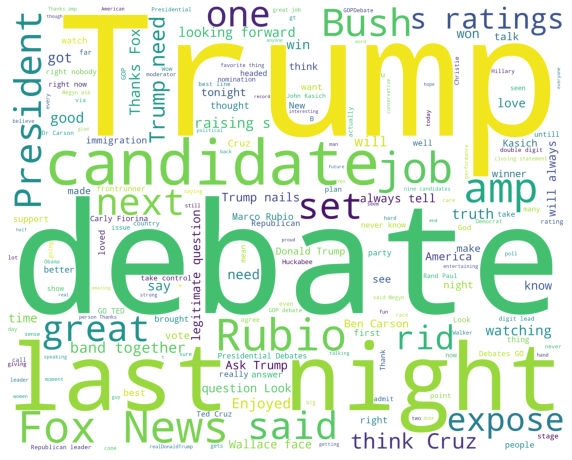

Negative Words


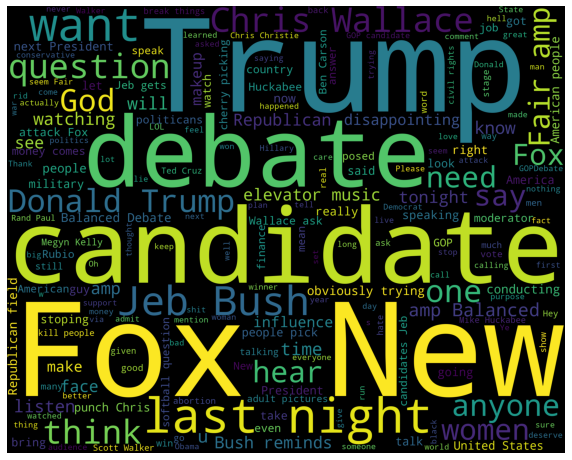

In [7]:
print("Positive Words")
wordcloud_draw(train_pos,'white')
print("Negative Words")
wordcloud_draw(train_neg,'black')

In [11]:
tweets =[]
stopwords_set = STOPWORDS

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

#separatinge positive and negative test data
test_pos = test[test.sentiment=="Positive"]
test_pos = test_pos.text
test_neg = test[test.sentiment=="Negative"]
test_neg = test_neg.text

In [12]:
#extracting word features